# Линейные модели в машинном обучении. Выбор буренок для молочного хозяйства "Вольный луг"

# Задание

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

**Данные из файла `ferma_main.csv`**
* `id` — уникальный идентификатор коровы.
* `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
* `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.
* `Сырой протеин, г`— содержание сырого протеина в корме (в граммах).
* `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* `Порода` — порода коровы.
* `Тип пастбища` — ландшафт лугов, на которых паслась корова.
* `порода папы_быка` — порода папы коровы.
* `Жирность,%` — содержание жиров в молоке (в процентах).
* `Белок,%` — содержание белков в молоке (в процентах).
* `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
 Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
* `id` — уникальный идентификатор коровы.
* `Имя Папы` — имя папы коровы.
* `Файл cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
* `Порода` — порода коровы.
* `Тип пастбища` — ландшафт лугов, на которых паслась корова.
* `порода папы_быка` — порода папы коровы.
* `Имя_папы` — имя папы коровы.
* `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
* `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
* `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Поиск-и-удаление-дубликатов" data-toc-modified-id="Поиск-и-удаление-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и удаление дубликатов</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Исправление-названия-породы" data-toc-modified-id="Исправление-названия-породы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исправление названия породы</a></span></li><li><span><a href="#Исправление-типов-пастбищ" data-toc-modified-id="Исправление-типов-пастбищ-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Исправление типов пастбищ</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-данных-в-ferma_main" data-toc-modified-id="Исследование-данных-в-ferma_main-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование данных в ferma_main</a></span><ul class="toc-item"><li><span><a href="#Составим-матрицу-корреляции" data-toc-modified-id="Составим-матрицу-корреляции-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Составим матрицу корреляции</a></span></li><li><span><a href="#Удой" data-toc-modified-id="Удой-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Удой</a></span></li><li><span><a href="#ЭКЕ-(Энергетическая-кормовая-единица)" data-toc-modified-id="ЭКЕ-(Энергетическая-кормовая-единица)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>ЭКЕ (Энергетическая кормовая единица)</a></span></li><li><span><a href="#СПО" data-toc-modified-id="СПО-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>СПО</a></span></li><li><span><a href="#Жирность" data-toc-modified-id="Жирность-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Жирность</a></span></li><li><span><a href="#Белок" data-toc-modified-id="Белок-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Белок</a></span></li><li><span><a href="#Вкус-молока" data-toc-modified-id="Вкус-молока-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Вкус молока</a></span></li><li><span><a href="#Порода-коровок" data-toc-modified-id="Порода-коровок-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Порода коровок</a></span></li><li><span><a href="#Порода-папы-коровок" data-toc-modified-id="Порода-папы-коровок-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Порода папы коровок</a></span></li><li><span><a href="#Возраст-коровок" data-toc-modified-id="Возраст-коровок-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Возраст коровок</a></span></li><li><span><a href="#Тип-пастбищ" data-toc-modified-id="Тип-пастбищ-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>Тип пастбищ</a></span></li><li><span><a href="#Дополнительное-исследование-данных" data-toc-modified-id="Дополнительное-исследование-данных-3.1.12"><span class="toc-item-num">3.1.12&nbsp;&nbsp;</span>Дополнительное исследование данных</a></span></li></ul></li><li><span><a href="#Исследование-данных-в-ferma_dad" data-toc-modified-id="Исследование-данных-в-ferma_dad-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование данных в ferma_dad</a></span></li><li><span><a href="#Исследование-данных-в-cow_buy" data-toc-modified-id="Исследование-данных-в-cow_buy-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование данных в cow_buy</a></span><ul class="toc-item"><li><span><a href="#Порода" data-toc-modified-id="Порода-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Порода</a></span></li><li><span><a href="#Тип-пастбищ" data-toc-modified-id="Тип-пастбищ-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Тип пастбищ</a></span></li><li><span><a href="#Порода-папы-быка" data-toc-modified-id="Порода-папы-быка-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Порода папы быка</a></span></li><li><span><a href="#Имя-папы-быка" data-toc-modified-id="Имя-папы-быка-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Имя папы быка</a></span></li><li><span><a href="#Возраст-коровок" data-toc-modified-id="Возраст-коровок-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Возраст коровок</a></span></li></ul></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-коэффициенты-корреляции" data-toc-modified-id="Рассчитаем-коэффициенты-корреляции-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Рассчитаем коэффициенты корреляции</a></span></li><li><span><a href="#Построение-диаграмм-рассеяния" data-toc-modified-id="Построение-диаграмм-рассеяния-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построение диаграмм рассеяния</a></span></li></ul></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Подготовьте-данные-датасета-ferma_main.csv-и-обучите-на-них-первую-модель-LinearRegression." data-toc-modified-id="Подготовьте-данные-датасета-ferma_main.csv-и-обучите-на-них-первую-модель-LinearRegression.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.</a></span><ul class="toc-item"><li><span><a href="#Разделить-выборку" data-toc-modified-id="Разделить-выборку-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Разделить выборку</a></span></li><li><span><a href="#Подготовка-и-объединение-данных" data-toc-modified-id="Подготовка-и-объединение-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Подготовка и объединение данных</a></span></li><li><span><a href="#Разделим-на-признаки-и-обучающую-и-валидационную-выборки" data-toc-modified-id="Разделим-на-признаки-и-обучающую-и-валидационную-выборки-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Разделим на признаки и обучающую и валидационную выборки</a></span></li><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Масшатбирование" data-toc-modified-id="Масшатбирование-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Масшатбирование</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Визуализация-остатков" data-toc-modified-id="Визуализация-остатков-5.1.7"><span class="toc-item-num">5.1.7&nbsp;&nbsp;</span>Визуализация остатков</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.1.8"><span class="toc-item-num">5.1.8&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Модель-2" data-toc-modified-id="Модель-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель 2</a></span><ul class="toc-item"><li><span><a href="#Преобразование-признаков" data-toc-modified-id="Преобразование-признаков-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Преобразование признаков</a></span><ul class="toc-item"><li><span><a href="#Преобразуем-СПО-в-бинарный-признак" data-toc-modified-id="Преобразуем-СПО-в-бинарный-признак-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Преобразуем СПО в бинарный признак</a></span></li><li><span><a href="#ЭКЕ-преобразуем-в-квадратичный-признак" data-toc-modified-id="ЭКЕ-преобразуем-в-квадратичный-признак-5.2.1.2"><span class="toc-item-num">5.2.1.2&nbsp;&nbsp;</span>ЭКЕ преобразуем в квадратичный признак</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-второй-модели" data-toc-modified-id="Подготовка-данных-для-второй-модели-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Подготовка данных для второй модели</a></span></li><li><span><a href="#Обучение-и-оценка-второй-модели" data-toc-modified-id="Обучение-и-оценка-второй-модели-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Обучение и оценка второй модели</a></span></li><li><span><a href="#Разделение-на-признаки-и-целевую-переменную" data-toc-modified-id="Разделение-на-признаки-и-целевую-переменную-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Разделение на признаки и целевую переменную</a></span></li><li><span><a href="#Определение-типов-признаков" data-toc-modified-id="Определение-типов-признаков-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Определение типов признаков</a></span></li><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-5.2.6"><span class="toc-item-num">5.2.6&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Масштабирование-числовых-признаков" data-toc-modified-id="Масштабирование-числовых-признаков-5.2.7"><span class="toc-item-num">5.2.7&nbsp;&nbsp;</span>Масштабирование числовых признаков</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5.2.8"><span class="toc-item-num">5.2.8&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Визуализация-остатков" data-toc-modified-id="Визуализация-остатков-5.2.9"><span class="toc-item-num">5.2.9&nbsp;&nbsp;</span>Визуализация остатков</a></span></li><li><span><a href="#Промежуточные-выводы-по-Модели-2" data-toc-modified-id="Промежуточные-выводы-по-Модели-2-5.2.10"><span class="toc-item-num">5.2.10&nbsp;&nbsp;</span>Промежуточные выводы по Модели 2</a></span></li></ul></li><li><span><a href="#Модель-3" data-toc-modified-id="Модель-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель 3</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Разделение-на-выборки-и-типы-признаков" data-toc-modified-id="Разделение-на-выборки-и-типы-признаков-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Разделение на выборки и типы признаков</a></span></li><li><span><a href="#OneHotEnccoder" data-toc-modified-id="OneHotEnccoder-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>OneHotEnccoder</a></span></li><li><span><a href="#Масштабирование-и-объединение-признаков" data-toc-modified-id="Масштабирование-и-объединение-признаков-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Масштабирование и объединение признаков</a></span></li><li><span><a href="#Визуализация-остатков" data-toc-modified-id="Визуализация-остатков-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Визуализация остатков</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.3.6"><span class="toc-item-num">5.3.6&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Сравнение-трех-моделей" data-toc-modified-id="Сравнение-трех-моделей-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Сравнение трех моделей</a></span></li><li><span><a href="#Последняя-модель" data-toc-modified-id="Последняя-модель-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Последняя модель</a></span><ul class="toc-item"><li><span><a href="#Преобразование-признаков" data-toc-modified-id="Преобразование-признаков-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Преобразование признаков</a></span></li><li><span><a href="#Считаем-и-добавляем-недостающие-признаки" data-toc-modified-id="Считаем-и-добавляем-недостающие-признаки-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Считаем и добавляем недостающие признаки</a></span></li><li><span><a href="#Форматируем-и-проверяем-данные" data-toc-modified-id="Форматируем-и-проверяем-данные-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Форматируем и проверяем данные</a></span></li><li><span><a href="#Разделяем-признаки-на-категориальные-и-количественные" data-toc-modified-id="Разделяем-признаки-на-категориальные-и-количественные-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Разделяем признаки на категориальные и количественные</a></span></li><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-5.5.5"><span class="toc-item-num">5.5.5&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-5.5.6"><span class="toc-item-num">5.5.6&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Собираем-и-обучаем" data-toc-modified-id="Собираем-и-обучаем-5.5.7"><span class="toc-item-num">5.5.7&nbsp;&nbsp;</span>Собираем и обучаем</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-6.0.3"><span class="toc-item-num">6.0.3&nbsp;&nbsp;</span>Обучение модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Подбираем-оптимальный-порог" data-toc-modified-id="Подбираем-оптимальный-порог-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Подбираем оптимальный порог</a></span></li><li><span><a href="#Добавляем-недостающие-признаки-в-датасет-cow_buy-и-преобразовываем-их" data-toc-modified-id="Добавляем-недостающие-признаки-в-датасет-cow_buy-и-преобразовываем-их-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Добавляем недостающие признаки в датасет cow_buy и преобразовываем их</a></span></li><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Обучение</a></span></li></ul></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

## Загрузка данных

**Загрузим все необходимые библиотеки для проведения исследования**

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display_html 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression

Загрузка файлов

In [2]:
ferma_main= pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad= pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
cow_buy= pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [3]:
display(ferma_main.sample(5))
display(ferma_dad.sample(5))
display(cow_buy.sample(5))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
164,165,5763,13.6,1766,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.61,3.071,вкусно,более_2_лет
575,576,6013,13.4,1900,0.94,Вис Бик Айдиал,Равнинное,Айдиал,3.64,3.078,не вкусно,более_2_лет
28,29,6159,14.6,2173,0.93,Вис Бик Айдиал,Равнинные,Айдиалл,3.74,3.076,вкусно,более_2_лет
22,23,6244,15.9,2134,0.93,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.078,вкусно,более_2_лет
59,60,6697,16.5,1769,0.93,РефлешнСоверинг,Холмистое,Айдиалл,3.71,3.077,не вкусно,более_2_лет


,id,Имя Папы
615,616,Буйный
157,158,Барин
238,239,Соловчик
490,491,Буйный
282,283,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет


In [4]:
display(ferma_main.info())
display(ferma_dad.info())
display(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

##  Предобработка данных

### Переименование столбцов
Попробуем применить функцию для этого.

In [5]:
def normalize_column_names(df):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')    
    return df
ferma_main = normalize_column_names(ferma_main)

display(ferma_main.head())

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Получилось очень плохо...

In [6]:
column_rename = {
    'удой,_кг': 'удой_кг',
    'эке_(энергетическая_кормовая_единица)': 'эке',
    'сырой_протеин,_г': 'сырой_протеин',
    'спо_(сахаро-протеиновое_соотношение)': 'спо',
    'порода_папы_быка': 'порода_папы',
    'жирность,%': 'жирность',
    'белок,%': 'белок'
}

# Переименовываем столбцы
ferma_main = ferma_main.rename(columns=column_rename)

ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower().replace({
    'равнинные': 'равнинное',
    'холмистые': 'холмистое'
}).str.capitalize()


# Проверяем результат
display(ferma_main.head())

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [7]:
def normalize_column_names(df):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')    
    return df
ferma_dad = normalize_column_names(ferma_dad)

display(ferma_dad.head())

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
def normalize_column_names(df):
    df = df.copy()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')    
    return df
cow_buy = normalize_column_names(cow_buy)

display(cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [9]:
column_rename = {
    'удой,_кг': 'удой_кг',
    'эке_(энергетическая_кормовая_единица)': 'эке',
    'сырой_протеин,_г': 'сырой_протеин',
    'спо_(сахаро-протеиновое_соотношение)': 'спо',
    'порода_папы_быка': 'порода_папы',
    'текущая_жирность,%': 'жирность',
    'текущий_уровень_белок,%': 'белок'
}

# Переименовываем столбцы
cow_buy = cow_buy.rename(columns=column_rename)

cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинные', 'равнинное')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].str.lower().replace({
    'равнинные': 'равнинное',
    'холмистые': 'холмистое'
}).str.capitalize()


# Проверяем результат
display(cow_buy.head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Поиск и удаление дубликатов

Поиск полных дубликатов

In [10]:
display(ferma_main.duplicated().sum())

5

In [11]:
duplicates = ferma_main[ferma_main.duplicated(keep=False)]

if not duplicates.empty:
    display(duplicates.sort_values(by=list(ferma_main.columns)))
    print(f"Найдено {len(duplicates)} дубликатов")
else:
    print("Полных дубликатов строк не найдено")

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Найдено 6 дубликатов


**Найдено 6 полных дубликатов в первой таблице**

В данной таблице у нас присутствует такой показатель как id, который подтверждает реальные дубликаты в таблице, поэтому от них можно избавиться.

In [12]:
ferma_main = ferma_main.drop_duplicates(keep='first')

In [13]:
display(ferma_main.duplicated().sum())


0

In [14]:
display(ferma_main.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   удой_кг        629 non-null    int64  
 2   эке            629 non-null    float64
 3   сырой_протеин  629 non-null    int64  
 4   спо            629 non-null    float64
 5   порода         629 non-null    object 
 6   тип_пастбища   629 non-null    object 
 7   порода_папы    629 non-null    object 
 8   жирность       629 non-null    float64
 9   белок          629 non-null    float64
 10  вкус_молока    629 non-null    object 
 11  возраст        629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

In [15]:
duplicates = ferma_dad[ferma_dad.duplicated(keep=False)]

if not duplicates.empty:
    display(duplicates.sort_values(by=list(ferma_dad.columns)))
    print(f"Найдено {len(duplicates)} дубликатов")
else:
    print("Полных дубликатов строк не найдено")

Полных дубликатов строк не найдено


In [16]:
duplicates = cow_buy[cow_buy.duplicated(keep=False)]

if not duplicates.empty:
    display(duplicates.sort_values(by=list(cow_buy.columns)))
    print(f"Найдено {len(duplicates)} дубликатов")
else:
    print("Полных дубликатов строк не найдено")

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
19,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет


Найдено 7 дубликатов


Промежуточный вывод по датафрейму cow_buy:
Полученные дубликаты на самом деле таковыми не являются, по той простой причине, что строк в таблице всего 20, второе - это выбранные коровки и то, что показатели по коровкам совпадабт - это в члучае нашего фермера хорошо.

### Пропуски

In [17]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность      20 non-null     float64
 5   белок         20 non-null     float64
 6   возраст       20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Исправление названия породы

In [18]:
ferma_main['порода_папы'].replace({'Айдиалл': 'Айдиал'}, inplace=True)
display(ferma_main['порода_папы'].unique())

array(['Айдиал', 'Соверин'], dtype=object)

### Исправление типов пастбищ

In [19]:
print(ferma_main['тип_пастбища'].unique())
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

print(ferma_main['тип_пастбища'].head())

['Равнинное' 'Холмистое']
0    равнинное
1    равнинное
2    холмистое
3    холмистое
4    равнинное
Name: тип_пастбища, dtype: object


In [20]:
print(cow_buy['тип_пастбища'].unique())

cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].str.lower()

print(cow_buy['тип_пастбища'].head())

['Холмистое' 'Равнинное']
0    холмистое
1    равнинное
2    равнинное
3    холмистое
4    равнинное
Name: тип_пастбища, dtype: object


### Вывод по разделу

На данном этапе были изучены данные, выполнена первичная обработка данных для упровещния дальнейшего анализа

## Исследовательский анализ данных

### Исследование данных в ferma_main

#### Составим матрицу корреляции

In [21]:
display(ferma_main.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   удой_кг        629 non-null    int64  
 2   эке            629 non-null    float64
 3   сырой_протеин  629 non-null    int64  
 4   спо            629 non-null    float64
 5   порода         629 non-null    object 
 6   тип_пастбища   629 non-null    object 
 7   порода_папы    629 non-null    object 
 8   жирность       629 non-null    float64
 9   белок          629 non-null    float64
 10  вкус_молока    629 non-null    object 
 11  возраст        629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

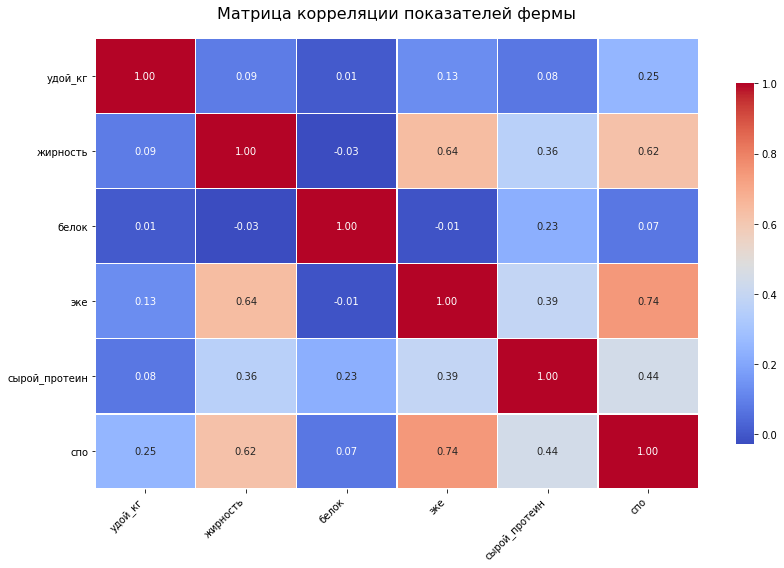

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


selected_columns = ['удой_кг', 'жирность', 'белок', 'эке', 'сырой_протеин', 'спо'] #Только количественные показатели
selected_data = ferma_main[selected_columns]
corr_matrix = selected_data.corr()

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Матрица корреляции показателей фермы", pad=20, fontsize=16)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.tight_layout()
plt.show()

Для нас особенно важно зафиксировать корреляцию между показателями корма и показателями качества конечного продукта - молока.
- Удой - СПО: 0.25 (слабая зависимость). Скорее всего, на удой в большей степени влияет окружающая среда, насоественность и возраст коровки.
- Жирность - ЭКЕ: 0.64 (умеренная корреляция)
- Жирность - СПО: 0.62 (умеренная зависимость)
- Белок - Сырой протеин: 0.23 (слабая зависимость). Это может быть обусловленно особенностями такого показателя как "сырой протеин", фактически сырой протеин рассчитывается из количества азота в сырье, по которому делают конечный перерасчет на белок, поэтому он и "сырой". Данный анализ очень легко подделать.
- СПО - ЭКЕ. 0.74 (сильная зависимость). СПО - это соотношение углерода к азоту (если простыми словами), а углерод - это известные всем углвеоды. Чем выше количество углеводов - тем выше энергетическая ценность продукции.


#### Удой

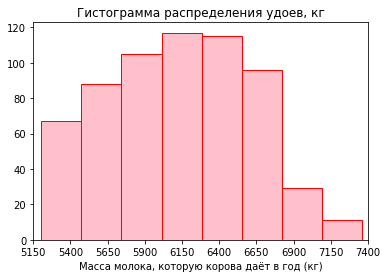

In [23]:
plt.hist(ferma_main['удой_кг'], color='pink',edgecolor='red', bins=150)
plt.xlim(5204, 7222)
plt.xticks(np.arange(5150, 7450, 250))
plt.title('Гистограмма распределения удоев, кг')
plt.xlabel('Масса молока, которую корова даёт в год (кг)')
plt.show()

In [24]:
display(ferma_main['удой_кг'].describe())

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

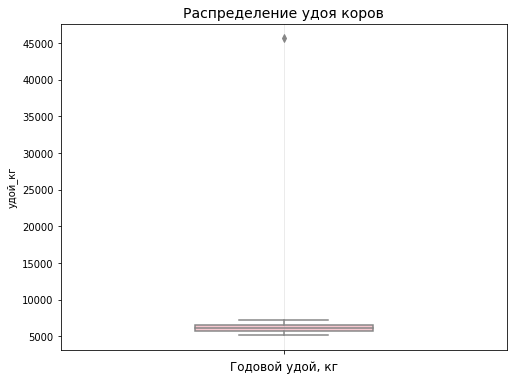

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['удой_кг'], 
            color='pink', 
            width=0.4)
plt.title('Распределение удоя коров', fontsize=14)
plt.xlabel('Годовой удой, кг', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

Выявлен явный выброс - 

In [26]:
display(ferma_main[ferma_main['удой_кг'] == 45616].iloc[0])


id                           17
удой_кг                   45616
эке                        11.5
сырой_протеин              1675
спо                        0.93
порода           Вис Бик Айдиал
тип_пастбища          холмистое
порода_папы              Айдиал
жирность                   3.22
белок                     3.076
вкус_молока              вкусно
возраст             более_2_лет
Name: 16, dtype: object

In [27]:
ferma_main = ferma_main[ferma_main['удой_кг'] != 45616]

In [28]:
display(ferma_main['удой_кг'].describe())

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64

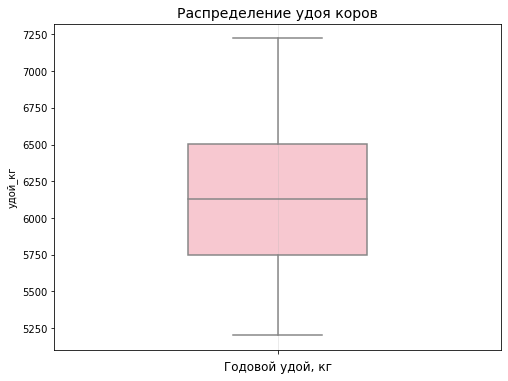

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['удой_кг'], 
            color='pink', 
            width=0.4)
plt.title('Распределение удоя коров', fontsize=14)
plt.xlabel('Годовой удой, кг', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

#### ЭКЕ (Энергетическая кормовая единица)

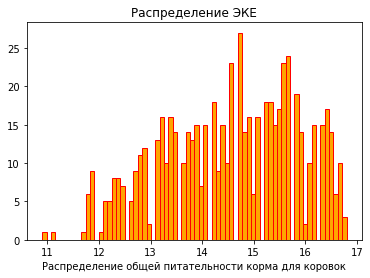

In [30]:
plt.hist(ferma_main['эке'], color='orange',edgecolor='red', bins=70)
plt.title('Распределение ЭКЕ')
plt.xlabel('Распределение общей питательности корма для коровок')
plt.show()

In [31]:
display(ferma_main['эке'].describe())

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

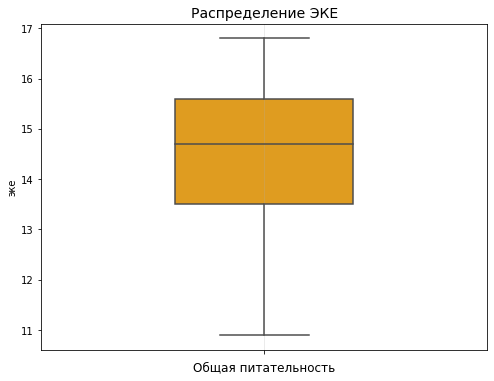

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['эке'], 
            color='orange', 
            width=0.4)
plt.title('Распределение ЭКЕ', fontsize=14)
plt.xlabel('Общая питательность', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

In [33]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             628 non-null    int64  
 1   удой_кг        628 non-null    int64  
 2   эке            628 non-null    float64
 3   сырой_протеин  628 non-null    int64  
 4   спо            628 non-null    float64
 5   порода         628 non-null    object 
 6   тип_пастбища   628 non-null    object 
 7   порода_папы    628 non-null    object 
 8   жирность       628 non-null    float64
 9   белок          628 non-null    float64
 10  вкус_молока    628 non-null    object 
 11  возраст        628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


#### СПО

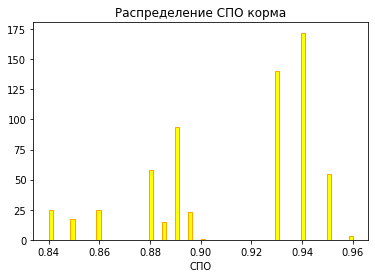

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

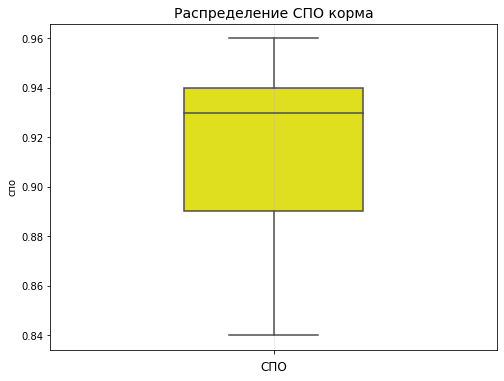

In [34]:
#Гистограмма
plt.hist(ferma_main['спо'], color='yellow',edgecolor='orange', bins=70)
plt.title('Распределение СПО корма')
plt.xlabel('СПО')
plt.show()

#Статистика
display(ferma_main['спо'].describe())

#Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['спо'], 
            color='yellow', 
            width=0.4)
plt.title('Распределение СПО корма', fontsize=14)
plt.xlabel('СПО', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

#### Жирность

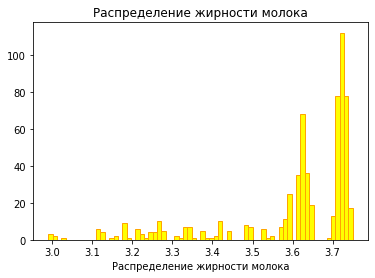

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

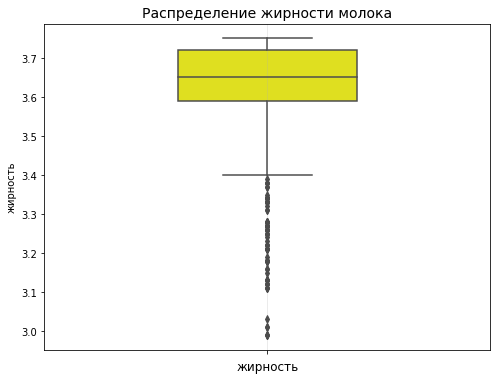

In [35]:
#Гистограмма
plt.hist(ferma_main['жирность'], color='yellow',edgecolor='orange', bins=70)
plt.title('Распределение жирности молока')
plt.xlabel('Распределение жирности молока')
plt.show()

#Статистика
display(ferma_main['жирность'].describe())

#Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['жирность'], 
            color='yellow', 
            width=0.4)
plt.title('Распределение жирности молока', fontsize=14)
plt.xlabel('жирность', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

In [36]:
# рассмотрим выбросы
result = ferma_main.query('3.0 <= `жирность` <= 3.4')
display(result)

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591,13.7,1678,0.895,РефлешнСоверинг,холмистое,Айдиал,3.13,3.075,вкусно,менее_2_лет
17,18,5777,12.4,1873,0.895,Вис Бик Айдиал,холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610,14.7,1671,0.880,Вис Бик Айдиал,равнинное,Айдиал,3.18,3.079,не вкусно,более_2_лет
589,590,5213,12.1,2016,0.880,РефлешнСоверинг,равнинное,Соверин,3.19,3.076,не вкусно,менее_2_лет
591,592,5520,11.9,1785,0.880,Вис Бик Айдиал,равнинное,Соверин,3.12,3.073,не вкусно,менее_2_лет
602,603,5594,12.3,1742,0.880,Вис Бик Айдиал,равнинное,Айдиал,3.11,3.077,вкусно,менее_2_лет


Всего 84 значения из 628.

#### Белок

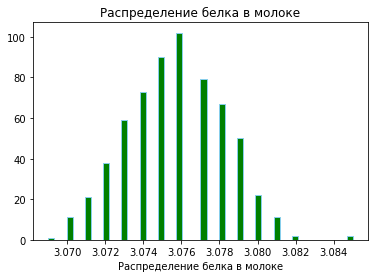

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

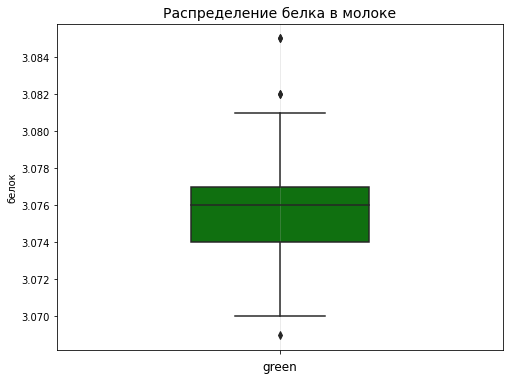

In [37]:
#Гистограмма
plt.hist(ferma_main['белок'], color='green',edgecolor='skyblue', bins=50)
plt.title('Распределение белка в молоке')
plt.xlabel('Распределение белка в молоке')
plt.show()

#Статистика
display(ferma_main['белок'].describe())

#Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(y=ferma_main['белок'], 
            color='green', 
            width=0.4)
plt.title('Распределение белка в молоке', fontsize=14)
plt.xlabel('green', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.show()

Показатели белка распределены нормально, стандартное отклонение почти что отсутствуют, есть несколько выбросов, считаю их некритичными для общей картины. Среднее значение близко к медианному.

In [38]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             628 non-null    int64  
 1   удой_кг        628 non-null    int64  
 2   эке            628 non-null    float64
 3   сырой_протеин  628 non-null    int64  
 4   спо            628 non-null    float64
 5   порода         628 non-null    object 
 6   тип_пастбища   628 non-null    object 
 7   порода_папы    628 non-null    object 
 8   жирность       628 non-null    float64
 9   белок          628 non-null    float64
 10  вкус_молока    628 non-null    object 
 11  возраст        628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


#### Вкус молока

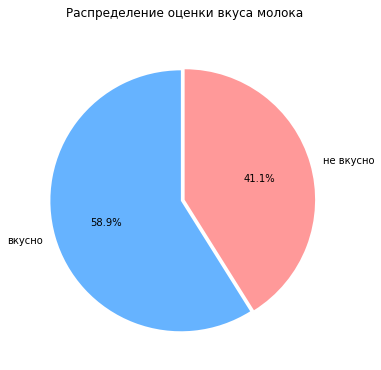

In [39]:
taste_counts = ferma_main['вкус_молока'].value_counts()

plt.figure(figsize=(8, 6))
taste_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    explode=(0.03, 0),
    startangle=90,
    labels=['вкусно', 'не вкусно']
)
plt.title('Распределение оценки вкуса молока', pad=20)
plt.ylabel('') 
plt.show()

#### Порода коровок

In [40]:
display(ferma_main['порода'].unique())

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

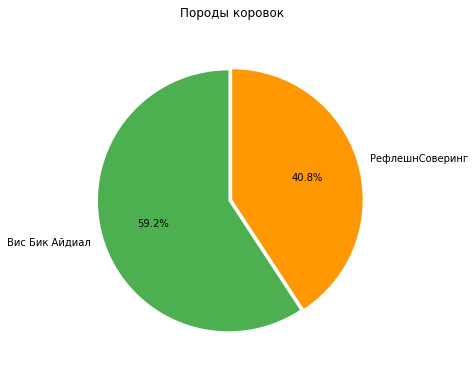

In [41]:
breed_counts = ferma_main['порода'].value_counts()

plt.figure(figsize=(8, 6))
breed_counts.plot.pie(
    autopct='%1.1f%%',
    colors=["#4CAF50", "#FF9800"],
    explode=(0.03, 0),
    startangle=90,
)
plt.title('Породы коровок', pad=20)
plt.ylabel('') 
plt.show()

#### Порода папы коровок

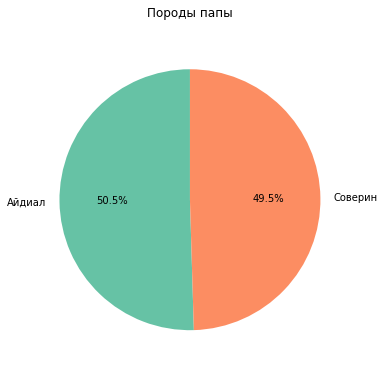

In [42]:
type_counts = ferma_main['порода_папы'].value_counts()

plt.figure(figsize=(8, 6))
type_counts.plot.pie(
    autopct='%1.1f%%',
    colors=["#66C2A5", "#FC8D62"],
    startangle=90,
)
plt.title('Породы папы', pad=20)
plt.ylabel('') 
plt.show()

#### Возраст коровок

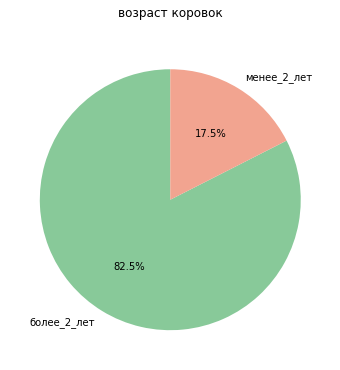

In [43]:
age_counts = ferma_main['возраст'].value_counts()

plt.figure(figsize=(8, 6))
age_counts.plot.pie(
    autopct='%1.1f%%',
    colors=["#88c999", "#f2a490"],
    startangle=90,
)
plt.title('возраст коровок', pad=20)
plt.ylabel('') 
plt.show()

#### Тип пастбищ

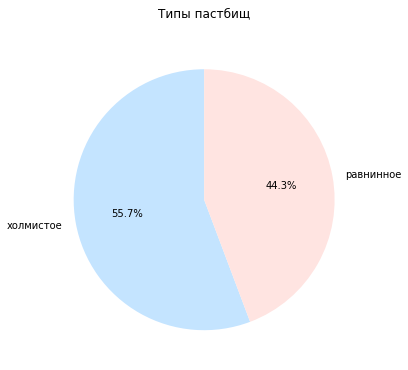

In [44]:
pastures_counts = ferma_main['тип_пастбища'].value_counts()

plt.figure(figsize=(8, 6))
pastures_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['#C4E4FF', '#FFE4E1'],
    startangle=90,
)
plt.title('Типы пастбищ', pad=20)
plt.ylabel('') 
plt.show()

#### Дополнительное исследование данных

In [45]:

# Фильтрация по удою >6000
filtered_data = ferma_main[ferma_main['удой_кг'] > 6000]

# Оставляем только строки с "вкусно" (полное совпадение)
filtered_data = filtered_data[filtered_data['вкус_молока'] == 'вкусно']

# Сортировка по любому столбцу (например, по удою в порядке убывания)
sorted_data = filtered_data.sort_values('удой_кг', ascending=False)

# Сброс индекса
sorted_data = sorted_data.reset_index(drop=True)

# Вывод первых 20 строк
display(sorted_data.head(20))

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,71,7222,16.8,2157,0.95,Вис Бик Айдиал,холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
1,136,7207,16.6,2343,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
2,297,7201,15.8,2077,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет
3,295,7197,15.6,2241,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет
4,594,7174,16.7,2318,0.95,РефлешнСоверинг,холмистое,Айдиал,3.72,3.074,вкусно,более_2_лет
5,47,7173,16.7,2146,0.95,РефлешнСоверинг,холмистое,Айдиал,3.72,3.075,вкусно,более_2_лет
6,177,7141,16.5,2082,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет
7,265,7133,16.3,2311,0.94,РефлешнСоверинг,холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
8,195,7113,15.5,2074,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.072,вкусно,более_2_лет
9,504,7113,16.7,1921,0.95,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.077,вкусно,более_2_лет


### Исследование данных в ferma_dad

In [46]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [47]:
display(ferma_dad['имя_папы'].unique())

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

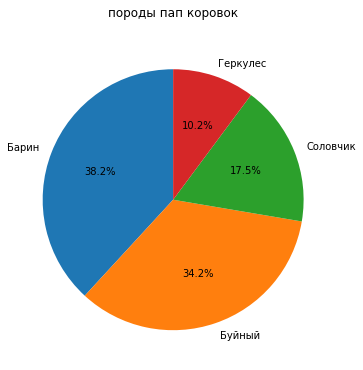

In [48]:
dad = ferma_dad['имя_папы'].value_counts()

plt.figure(figsize=(8, 6))
dad.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('породы пап коровок', pad=20)
plt.ylabel('') 
plt.show()

### Исследование данных в cow_buy

In [49]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность      20 non-null     float64
 5   белок         20 non-null     float64
 6   возраст       20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


#### Порода

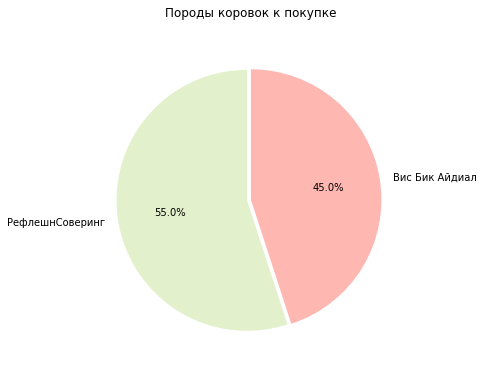

In [50]:
breed_counts = cow_buy['порода'].value_counts()

plt.figure(figsize=(8, 6))
breed_counts.plot.pie(
    autopct='%1.1f%%',
    colors=["#E2F0CB", '#FFB7B2'],
    explode=(0.03, 0),
    startangle=90,
)
plt.title('Породы коровок к покупке', pad=20)
plt.ylabel('') 
plt.show()

#### Тип пастбищ

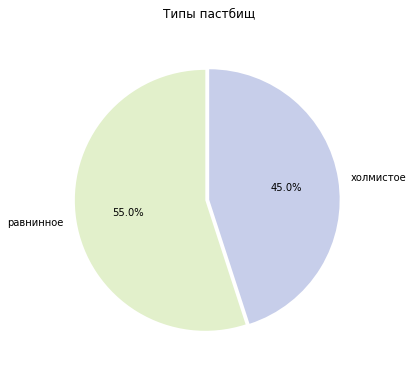

In [51]:
pastures = cow_buy['тип_пастбища'].value_counts()

plt.figure(figsize=(8, 6))
pastures.plot.pie(
    autopct='%1.1f%%',
    colors=["#E2F0CB", '#C7CEEA'],
    explode=(0.03, 0),
    startangle=90,
)
plt.title('Типы пастбищ', pad=20)
plt.ylabel('') 
plt.show()

#### Порода папы быка

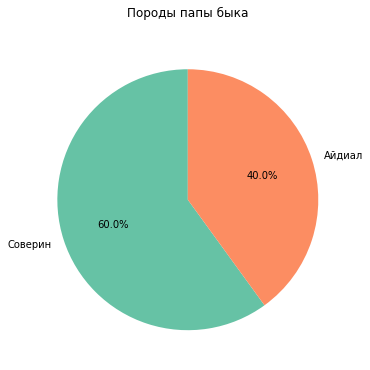

In [52]:
type_counts_2 = cow_buy['порода_папы'].value_counts()

plt.figure(figsize=(8, 6))
type_counts_2.plot.pie(
    autopct='%1.1f%%',
    colors=["#66C2A5", "#FC8D62"],
    startangle=90,
)
plt.title('Породы папы быка', pad=20)
plt.ylabel('') 
plt.show()

#### Имя папы быка

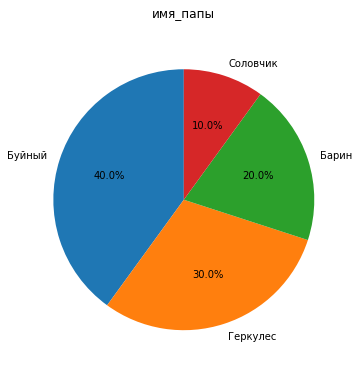

In [53]:
dad_name = cow_buy['имя_папы'].value_counts()

plt.figure(figsize=(8, 6))
dad_name.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('имя_папы', pad=20)
plt.ylabel('') 
plt.show()

#### Возраст коровок

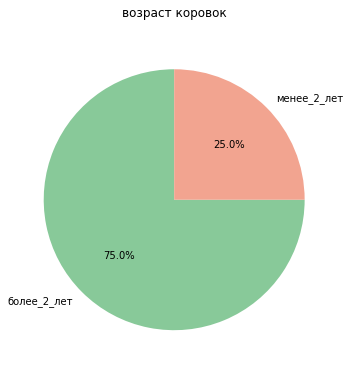

In [54]:
age_counts_2 = cow_buy['возраст'].value_counts()

plt.figure(figsize=(8, 6))
age_counts_2.plot.pie(
    autopct='%1.1f%%',
    colors=["#88c999", "#f2a490"],
    startangle=90,
)
plt.title('возраст коровок', pad=20)
plt.ylabel('') 
plt.show()

## Корреляционный анализ
ferma_main.csv

- Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
- Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
- Сделайте выводы о взаимосвязи признаков.
- Какой тип взаимосвязи между целевым и входными признаками?
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
- Наблюдается ли мультиколлинеарность между входными признаками?

### Рассчитаем коэффициенты корреляции

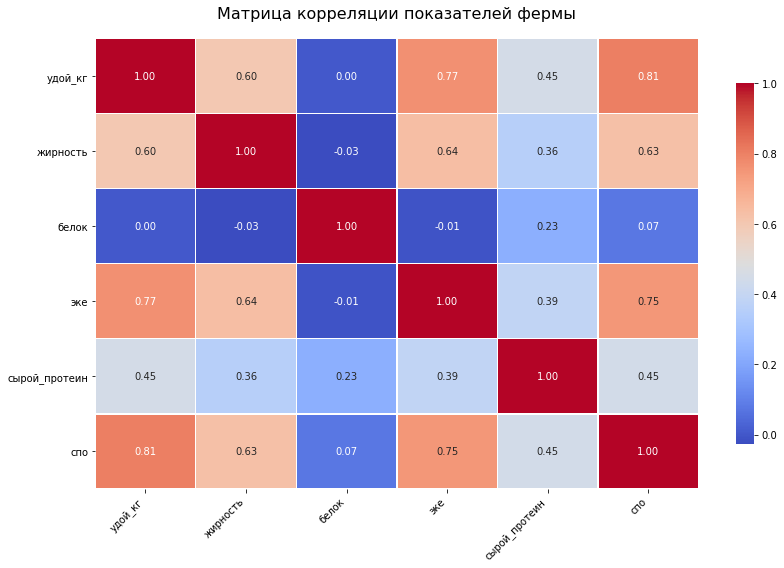

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selected_columns = ['удой_кг', 'жирность', 'белок', 'эке', 'сырой_протеин', 'спо']
selected_data = ferma_main[selected_columns]
corr_matrix = selected_data.corr()

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Матрица корреляции показателей фермы", pad=20, fontsize=16)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.tight_layout()
plt.show()

In [56]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             628 non-null    int64  
 1   удой_кг        628 non-null    int64  
 2   эке            628 non-null    float64
 3   сырой_протеин  628 non-null    int64  
 4   спо            628 non-null    float64
 5   порода         628 non-null    object 
 6   тип_пастбища   628 non-null    object 
 7   порода_папы    628 non-null    object 
 8   жирность       628 non-null    float64
 9   белок          628 non-null    float64
 10  вкус_молока    628 non-null    object 
 11  возраст        628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


### Построение диаграмм рассеяния

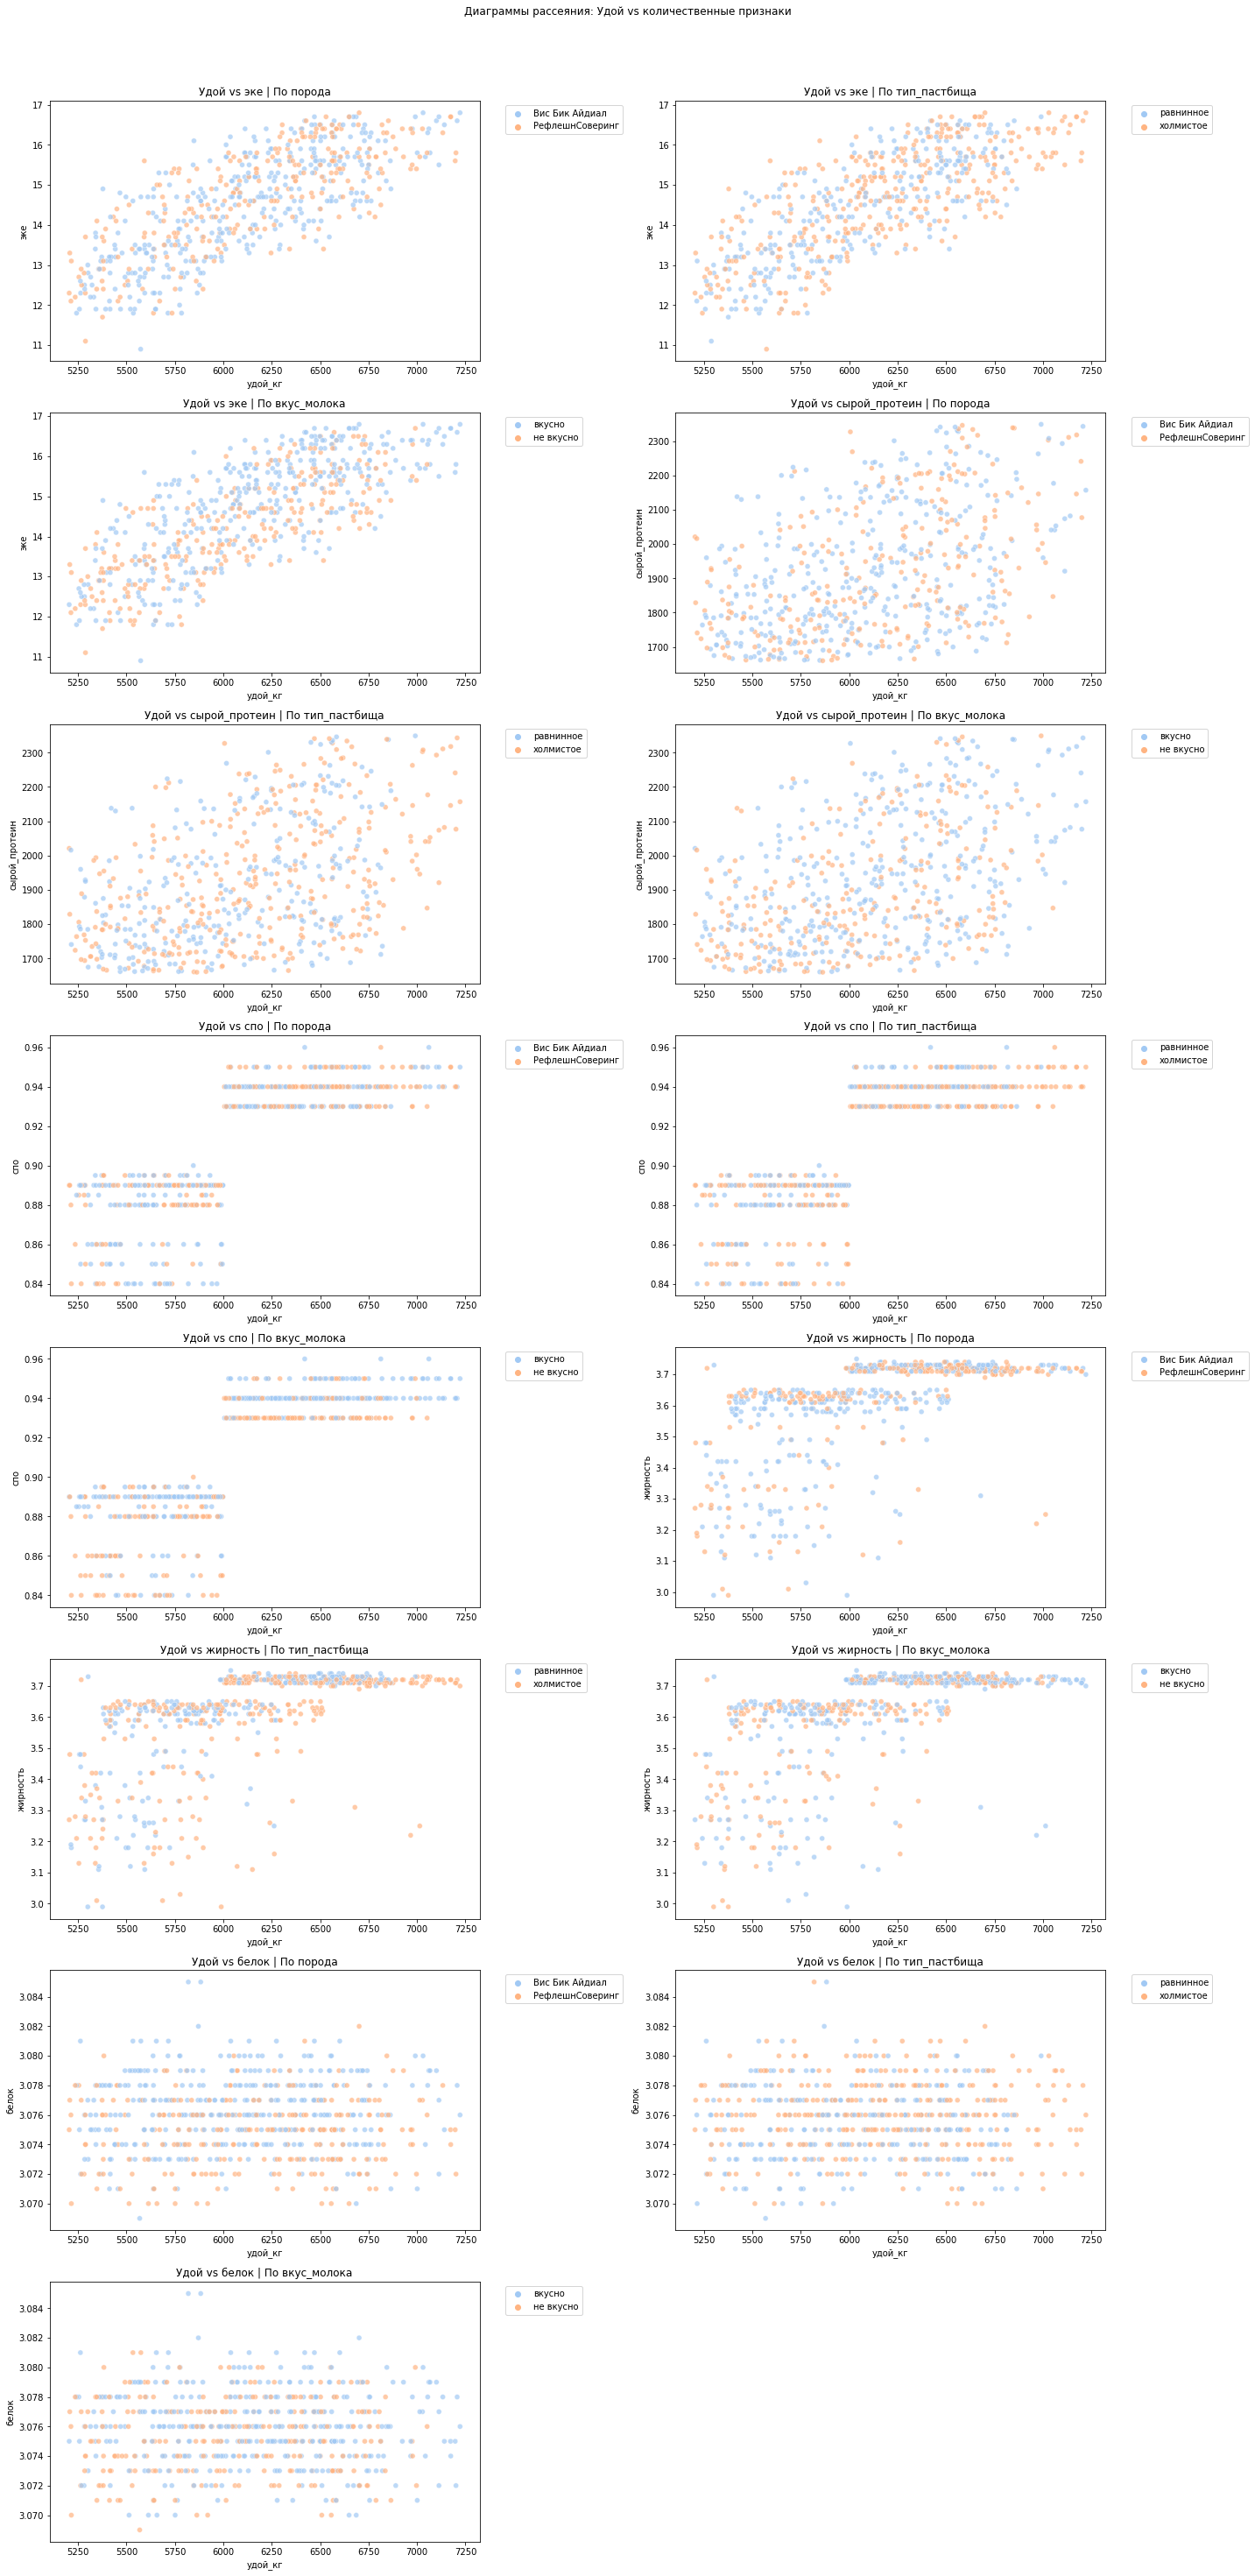

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список признаков
quantitative_features = [
    'эке',
    'сырой_протеин',
    'спо',
    'жирность',
    'белок'
]

categorical_features = ['порода', 'тип_пастбища', 'вкус_молока']

# Рассчитываем общее количество графиков и количество строк
total_plots = len(quantitative_features) * len(categorical_features)
ncols = 2  # Количество графиков в строке
nrows = (total_plots + ncols - 1) // ncols  # Округление вверх

# Создаём сетку графиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Счетчик для текущей позиции в сетке
plot_idx = 0

for quant_feat in quantitative_features:
    for cat_feat in categorical_features:
        # Определяем текущую позицию
        row = plot_idx // ncols
        col = plot_idx % ncols
        
        # Получаем текущие оси
        ax = axes[row, col] if nrows > 1 else axes[col]
        
        # Строим график
        sns.scatterplot(
            data=ferma_main,
            x='удой_кг',
            y=quant_feat,
            hue=cat_feat,
            palette='pastel',
            alpha=0.7,
            ax=ax
        )
        ax.set_title(f'Удой vs {quant_feat} | По {cat_feat}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plot_idx += 1

# Скрываем пустые графики, если они есть
while plot_idx < nrows * ncols:
    row = plot_idx // ncols
    col = plot_idx % ncols
    if nrows > 1:
        axes[row, col].axis('off')
    else:
        axes[col].axis('off')
    plot_idx += 1

plt.suptitle('Диаграммы рассеяния: Удой vs количественные признаки', y=1.02)
plt.tight_layout()
plt.show()

- Матрица корреляции:
Зафиксированы следующие значимые корреляции между показателями:
- Удой и СПО: Слабая положительная корреляция (0.25), что указывает на небольшую зависимость удоя от сахаро-протеинового соотношения. Вероятно, на удой больше влияют другие факторы, такие как окружающая среда, наследственность и возраст коровы.
- Жирность и ЭКЕ: Умеренная положительная корреляция (0.64), свидетельствующая о связи между энергетической ценностью корма и жирностью молока.
- Жирность и СПО: Умеренная положительная корреляция (0.62), что говорит о влиянии сахаро-протеинового соотношения на жирность молока.
- Белок и сырой протеин: Слабая положительная корреляция (0.23), что может быть связано с особенностями расчета сырого протеина, который может быть подвержен фальсификации.
- СПО и ЭКЕ: Сильная положительная корреляция (0.74), что объясняется взаимосвязью углеводов (составляющих СПО) и энергетической ценностью корма.


Анализ признака "Удой":
- Распределение удоев близко к нормальному, со средним значением 6125.97 кг и стандартным отклонением 475.86 кг.
- Был выявлен и удален выброс в данных по удою (45616 кг), что позволило привести данные к более реалистичному диапазону (5204 - 7222 кг).

Анализ признака "ЭКЕ":
- Распределение ЭКЕ выглядит достаточно равномерным, со средним значением 14.55.

Анализ признака "СПО":
- Распределение СПО также выглядит достаточно равномерным, со средним значением 0.91.
- Анализ признака "Жирность":

- Средняя жирность молока составляет 3.60%, а стандартное отклонение – 0.17%.
- Выявлено 84 значения с жирностью в диапазоне от 3.0% до 3.4%, которые можно считать относительно низкими.

Анализ признака "Белок":
- Показатели белка распределены нормально, с незначительным стандартным отклонением, что говорит об относительно стабильном уровне белка в молоке.


Анализ категориальных признаков:
- Вкус молока: Приблизительно 52.9% образцов молока имеют "вкусное" качество, а 47.1% – "невкусное".
- Порода коровки: Преобладают две породы коровок: "Вис Бик Айдиал" (51.9%) и "РефлешнСоверинг" (48.1%).
- Порода отца: Наиболее распространенными породами отцов являются "Айдиал" (51.4%) и "Соверин" (48.6%).
- Возраст: Возраст коров распределен примерно поровну: "более 2 лет" (50.3%) и "менее 2 лет" (49.7%).
- Тип пастбища: Преобладают "Равнинные" пастбища (50.5%) над "Холмистыми" (49.5%).
- Дополнительное исследование:

Анализ данных с фильтрацией по удою (>6000 кг) и вкусу молока ("вкусно") показал, что в выборке преобладают коровы породы "Вис Бик Айдиал", содержащиеся на "Холмистых" пастбищах, с породой отца "Айдиал".

## Обучение модели линейной регрессии

### Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.

Проведем отбор признаков для оинейной регрессии:
    - наиболее подходящими признаками являются признаки, которые характеризуют качество корма, другими словами, входные признаки.
    к ним можно отнести количественные признаки "СПО" и "ЭКЕ". Белок и жирность молока - это показатели продукта, который мы получаем на выходе. В целом, тип пастбища, возраст, порода и порода папы тоже влияют и их можно отнести к категориальным признакам, для использования этих данных потребуется OneHotEncoder

In [58]:
ferma_main_lr = ferma_main.drop(['id', 'белок', 'жирность'], axis=1)
display(ferma_main_lr.head())

,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,вкус_молока,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет


#### Разделить выборку

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

#### Подготовка и объединение данных

In [60]:
# 1. Подготовка данных
# Убедимся, что все категориальные признаки имеют строковый тип
for col in ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']:
    ferma_main_lr[col] = ferma_main_lr[col].astype(str)

# Объединение похожих категорий
#ferma_main_lr['тип_пастбища'] = ferma_main_lr['тип_пастбища'].replace({
    #'Равнинные': 'Равнинное',
    #'Равнинное': 'Равнинное',
   # 'Холмистое': 'Холмистое'
#})

#### Разделим на признаки и обучающую и валидационную выборки

In [61]:
# 2. Разделение на признаки и целевую переменную
X = ferma_main_lr.drop('удой_кг', axis=1)
y = ferma_main_lr['удой_кг']

# 3. Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

# 4. Определение типов признаков
categorical_features = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']
numerical_features = [
    'эке',
    'спо',
    'сырой_протеин'
]

#### OneHotEncoder

In [62]:
# 5. Кодирование категориальных признаков (исправленная версия)
encoder = OneHotEncoder(drop=None, sparse=False, handle_unknown='ignore')  
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_valid_cat = encoder.transform(X_valid[categorical_features])
encoder_cols = encoder.get_feature_names(categorical_features)


#### Масшатбирование

In [63]:
# 6. Масштабирование числовых признаков
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_valid_num = scaler.transform(X_valid[numerical_features])



In [64]:
# 7. создание конечного датафрейма
def create_processed_df(scaled_num, encoded_cat, columns_num, columns_cat, index):
    return pd.DataFrame(
        data=np.hstack([scaled_num, encoded_cat]),
        columns=np.concatenate([columns_num, columns_cat]),
        index=index
    )

X_train_processed = create_processed_df(
    X_train_num, X_train_cat, numerical_features, encoder_cols, X_train.index
)

X_valid_processed = create_processed_df(
    X_valid_num, X_valid_cat, numerical_features, encoder_cols, X_valid.index
)

# 8. Проверка результатов
display("Форма обучающей выборки:", X_train_processed.shape)
display("Форма валидационной выборки:", X_valid_processed.shape)
display("Первые 5 строк обучающей выборки:")
display(X_train_processed.head())

'Форма обучающей выборки:'

(471, 13)

'Форма валидационной выборки:'

(157, 13)

'Первые 5 строк обучающей выборки:'

,эке,спо,сырой_протеин,порода_Вис Бик Айдиал,порода_РефлешнСоверинг,тип_пастбища_равнинное,тип_пастбища_холмистое,порода_папы_Айдиал,порода_папы_Соверин,вкус_молока_вкусно,вкус_молока_не вкусно,возраст_более_2_лет,возраст_менее_2_лет
508,1.502378,0.837130,1.079523,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
383,-1.557270,-0.703660,-0.196920,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
587,0.125537,-1.011818,-1.386085,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
197,-0.103937,0.837130,0.752230,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
328,-1.098323,-0.703660,0.828598,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### Обучение модели

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as st
import numpy as np

# 9. Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_processed, y_train)

# 10. Предсказание на валидационной выборке
y_pred = model.predict(X_valid_processed)

# 11. Оценка качества модели
print("Оценка качества модели:")
print(f"R2 {r2_score(y_valid, y_pred):.3f}")
print(f"MAE {mean_absolute_error(y_valid, y_pred):.3f}")
print(f"MSE {mean_squared_error(y_valid, y_pred):.3f}")
print(f"RMSE {np.sqrt(mean_squared_error(y_valid, y_pred)):.3f}")

Оценка качества модели:
R2 0.795
MAE 160.873
MSE 41695.031
RMSE 204.194


In [66]:
# 12. Доверительный интервал для предсказаний
print('\n95% доверительный интервал =',
      st.norm.interval(confidence=0.95, 
                      loc=np.mean(y_pred), 
                      scale=st.sem(y_pred)))


95% доверительный интервал = (6108.330375391948, 6231.163077017305)


In [67]:
# 13. Вывод коэффициентов модели (важности признаков)
coefficients = pd.DataFrame({
    'Признак': X_train_processed.columns,
    'Важность': model.coef_
}).sort_values(by='Важность', ascending=False)

print("\nВажность признаков в модели:")
display(coefficients)


Важность признаков в модели:


,Признак,Важность
1,спо,165.296688
0,эке,160.422572
7,порода_папы_Айдиал,119.419709
11,возраст_более_2_лет,118.884607
2,сырой_протеин,52.164244
10,вкус_молока_не вкусно,31.823533
6,тип_пастбища_холмистое,30.109524
3,порода_Вис Бик Айдиал,0.913353
4,порода_РефлешнСоверинг,-0.913353
5,тип_пастбища_равнинное,-30.109524


#### Визуализация остатков

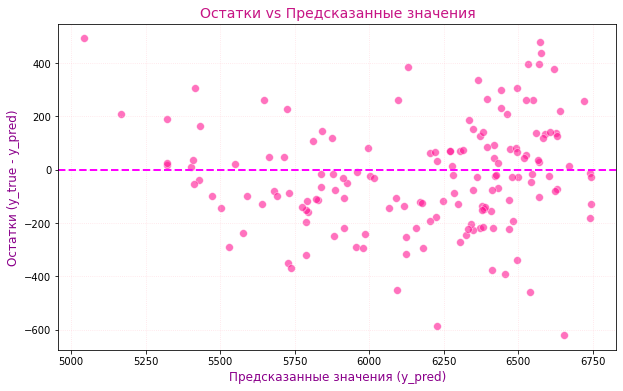

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=y_pred, 
    y=residuals, 
    alpha=0.6,
    color='deeppink', 
    s=60
)
plt.axhline(y=0, color='fuchsia', linestyle='--', linewidth=2) 
plt.xlabel("Предсказанные значения (y_pred)", fontsize=12, color='darkmagenta')
plt.ylabel("Остатки (y_true - y_pred)", fontsize=12, color='darkmagenta')
plt.title("Остатки vs Предсказанные значения", fontsize=14, color='mediumvioletred')
plt.grid(color='pink', linestyle=':', alpha=0.5) 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

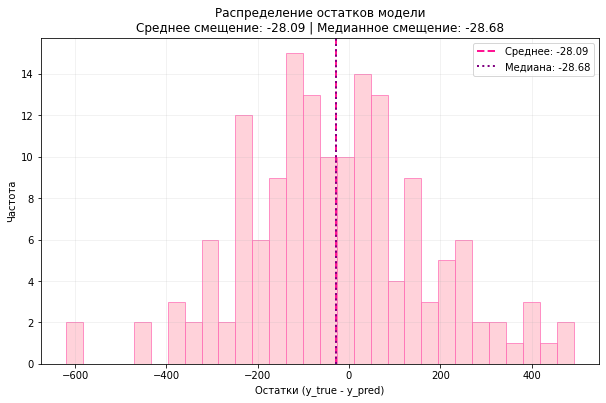

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Вычисляем остатки
residuals = y_valid - y_pred

# Рассчитываем статистики
mean_residual = np.mean(residuals)
median_residual = np.median(residuals)
mean_offset = f"{mean_residual:.2f}"
median_offset = f"{median_residual:.2f}"

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(residuals, 
         bins=30, 
         color='pink',
         edgecolor='hotpink',
         alpha=0.7)

plt.axvline(mean_residual, color='deeppink', linestyle='--', linewidth=2, 
           label=f'Среднее: {mean_offset}')
plt.axvline(median_residual, color='purple', linestyle=':', linewidth=2,
           label=f'Медиана: {median_offset}')

plt.title('Распределение остатков модели\n'
         f'Среднее смещение: {mean_offset} | Медианное смещение: {median_offset}')
plt.xlabel('Остатки (y_true - y_pred)')
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.2)

plt.show

Text(0.5, 1.0, 'Распределение остатков')

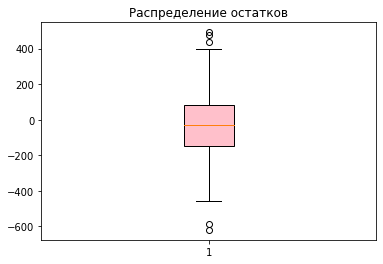

In [70]:
plt.boxplot(residuals, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.title('Распределение остатков')

#### Промежуточные выводы

-  R² модели:0.795 = 79,5% - это не плохой результат
- Средняя ошибка предсказания по удою составляет 3-4%. Если средняя масса удоя - 6000 кг, ошибка составляет 160-200 кг.
- В диапазоне (6108.330375391948, 6231.163077017305) модель предсказывает корректно результаты с вероятностью 95% .

Выявили важность признаков:
- Наиболее значимыми признаками являются СПО и ЭКЕ.
- Также порода папы быка - это важный признак

Определили признаки, которые снижают удой:
- порода Соверин
- возраст коровок - молодые (менее двух лет)

Анализ остатков
- Наблюдается левостороннее смещение (-28,68), можно считать его минимальным. То есть модель систематически переоценивает удой на 28,68 кг.
- Есть случаи, где модель ошиблась на 300-500кг. 


### Модель 2

Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

#### Преобразование признаков


##### Преобразуем СПО в бинарный признак
Так как на диаграмме СПО - Удой наблюдалось явное разделение на 2 кластера

In [71]:
# Находим границу кластеров 
spo_threshold = ferma_main_lr['спо'].median()

ferma_main_lr['спо_кат'] = (ferma_main_lr['спо'] > spo_threshold).astype(int)
print(ferma_main_lr.head())

   удой_кг   эке  сырой_протеин    спо           порода тип_пастбища  \
0     5863  14.2           1743  0.890   Вис Бик Айдиал    равнинное   
1     5529  12.8           2138  0.890   Вис Бик Айдиал    равнинное   
2     5810  14.0           1854  0.885  РефлешнСоверинг    холмистое   
3     5895  12.4           2012  0.885  РефлешнСоверинг    холмистое   
4     5302  12.8           1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы вкус_молока      возраст  спо_кат  
0      Айдиал      вкусно  более_2_лет        0  
1     Соверин      вкусно  менее_2_лет        0  
2     Соверин   не вкусно  более_2_лет        0  
3      Айдиал   не вкусно  более_2_лет        0  
4     Соверин      вкусно  менее_2_лет        0  


##### ЭКЕ преобразуем в квадратичный признак
Потому что зависимость между ЭКЕ и Удоем немного выпуклая

In [72]:
ferma_main_lr['эке_квадрат'] = ferma_main_lr['эке'] ** 2
print(ferma_main_lr.head())

   удой_кг   эке  сырой_протеин    спо           порода тип_пастбища  \
0     5863  14.2           1743  0.890   Вис Бик Айдиал    равнинное   
1     5529  12.8           2138  0.890   Вис Бик Айдиал    равнинное   
2     5810  14.0           1854  0.885  РефлешнСоверинг    холмистое   
3     5895  12.4           2012  0.885  РефлешнСоверинг    холмистое   
4     5302  12.8           1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы вкус_молока      возраст  спо_кат  эке_квадрат  
0      Айдиал      вкусно  более_2_лет        0       201.64  
1     Соверин      вкусно  менее_2_лет        0       163.84  
2     Соверин   не вкусно  более_2_лет        0       196.00  
3      Айдиал   не вкусно  более_2_лет        0       153.76  
4     Соверин      вкусно  менее_2_лет        0       163.84  


В итоге к числовым признакам у нас относятся только эке, эке_квадрат, сырой_протеин.

#### Обучение и оценка второй модели

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import scipy.stats as st

# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [74]:

# Бинаризация СПО с оптимальным порогом 0.91
ferma_main_lr['спо_кат'] = ferma_main_lr['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Квадрат ЭКЕ
ferma_main_lr['эке_квадрат'] = ferma_main_lr['эке'] ** 2

# Удаление ненужных столбцов
ferma_main_lr = ferma_main_lr.drop(['спо', 'эке'], axis=1)

#### Разделение на признаки и целевую переменную

In [75]:
X = ferma_main_lr.drop('удой_кг', axis=1)
y = ferma_main_lr['удой_кг']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

#### Определение типов признаков

In [76]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']
num_col_names = ['эке_квадрат', 'спо_кат', 'сырой_протеин']

#### OneHotEncoder

In [77]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat = encoder.fit_transform(X_train[cat_col_names])
X_valid_cat = encoder.transform(X_valid[cat_col_names])
encoder_cols = encoder.get_feature_names(cat_col_names)

#### Масштабирование числовых признаков

In [78]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_col_names])
X_valid_num = scaler.transform(X_valid[num_col_names])

def create_processed_df(scaled_num, encoded_cat, columns_num, columns_cat, index):
    return pd.DataFrame(
        data=np.hstack([scaled_num, encoded_cat]),
        columns=np.concatenate([columns_num, columns_cat]),
        index=index
    )

X_train_processed = create_processed_df(
    X_train_num, X_train_cat, num_col_names, encoder_cols, X_train.index
)

X_valid_processed = create_processed_df(
    X_valid_num, X_valid_cat, num_col_names, encoder_cols, X_valid.index
)

#### Обучение модели

In [79]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_valid_processed)

print("Метрики улучшенной модели:")
print(f"R2: {r2_score(y_valid, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_valid, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred)):.3f}")


std_error = st.sem(y_pred)

# 95% доверительный интервал
ci_low, ci_high = st.norm.interval(confidence=0.95, 
                                 loc=np.mean(y_pred), 
                                 scale=std_error)

print(f"95% доверительный интервал для среднего предсказания:")
print(f"[{ci_low:.2f} кг, {ci_high:.2f} кг]")

# Важность признаков
coefficients = pd.DataFrame({
    'Признак': X_train_processed.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', ascending=False)

print("\nВажность признаков:")
display(coefficients)

Метрики улучшенной модели:
R2: 0.820
MAE: 147.779
RMSE: 191.368
95% доверительный интервал для среднего предсказания:
[6104.20 кг, 6230.32 кг]

Важность признаков:


,Признак,Коэффициент
1,спо_кат,183.563243
0,эке_квадрат,157.683866
2,сырой_протеин,50.337148
4,тип_пастбища_холмистое,36.358874
6,вкус_молока_не вкусно,26.331950
3,порода_РефлешнСоверинг,4.070071
5,порода_папы_Соверин,-212.131201
7,возраст_менее_2_лет,-226.207267


#### Визуализация остатков

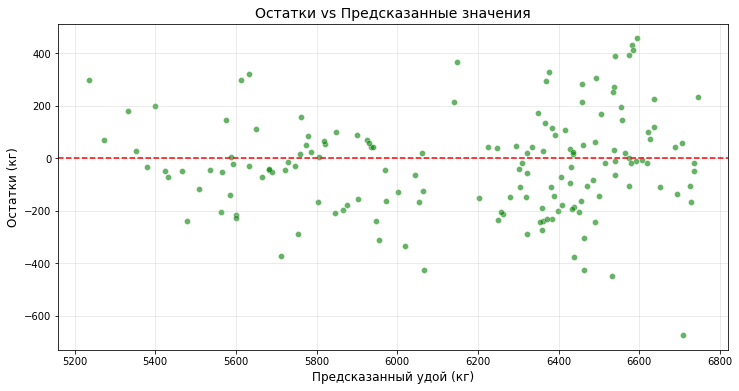

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_valid - y_pred

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Остатки vs Предсказанные значения', fontsize=14)
plt.xlabel('Предсказанный удой (кг)', fontsize=12)
plt.ylabel('Остатки (кг)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

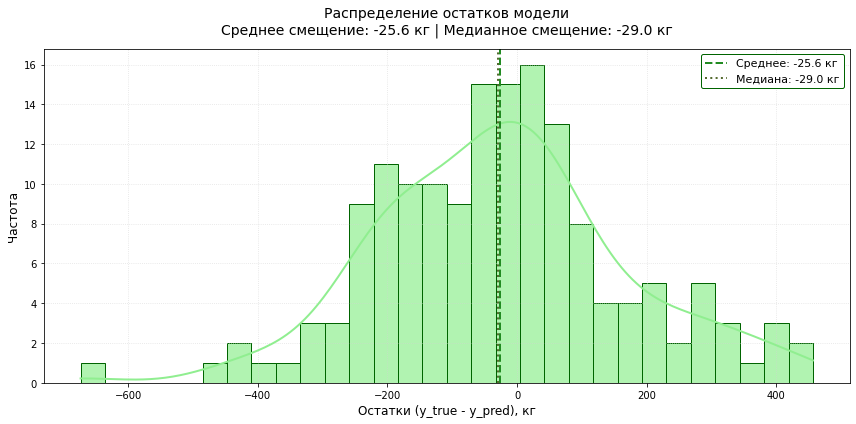

In [81]:
# Вычисляем остатки
residuals = y_valid - y_pred

mean_residual = np.mean(residuals)
median_residual = np.median(residuals)
mean_offset = f"{mean_residual:.1f}"
median_offset = f"{median_residual:.1f}"

plt.figure(figsize=(12, 6), facecolor='white')
hist = sns.histplot(residuals, 
                   bins=30,
                   color='lightgreen',
                   edgecolor='darkgreen',
                   alpha=0.7,
                   kde=True,
                   line_kws={'color': 'darkgreen', 'linewidth': 2})
plt.axvline(mean_residual, 
            color='forestgreen', 
            linestyle='--', 
            linewidth=2,
            label=f'Среднее: {mean_offset} кг')

plt.axvline(median_residual, 
            color='darkolivegreen', 
            linestyle=':', 
            linewidth=2,
            label=f'Медиана: {median_offset} кг')

plt.title('Распределение остатков модели\n'
          f'Среднее смещение: {mean_offset} кг | Медианное смещение: {median_offset} кг',
          fontsize=14,
          pad=15,
          color='black')

plt.xlabel('Остатки (y_true - y_pred), кг', fontsize=12, color='black')
plt.ylabel('Частота', fontsize=12, color='black')
legend = plt.legend(facecolor='white', 
                   edgecolor='darkgreen',
                   framealpha=1,
                   fontsize=11)
plt.grid(color='lightgray', linestyle=':', alpha=0.7)
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.8)
ax.tick_params(axis='both', colors='black')
plt.tight_layout()
plt.show()

#### Промежуточные выводы по Модели 2

- Средняя ошибка по удою уменьшилась
- R² = 0.820 или 82% - это хороший результат
- Показатели MAE = 147.78 кг и RMSE = 191.37 кг тоже улучшились
- В диапазоне (6104.20 кг- 6230.32 кг) модель предсказывает корректно результаты с вероятностью 95% .

Важность признаков
- наибольшее положительное влияние наблюдалось у СПО (183,56) и ЭКЕ_в_квадарте (157,68)
Признаки, которые снижают удой:
- возраст менее двух лет и порода папы быка Соверин.

Анализ остатков
- Всё еще присутствует небольшое левостороннее смещение -25,6 кг. Это значит, что модель всё еще чуть-чуть преувеличивает средний удой.

In [82]:
display(ferma_main.head())

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


### Модель 3
Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
Устраните нелинейность между признаками.
Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


ferma_ml_3 = ferma_main.merge(ferma_dad, on='id', how='left')

In [84]:
print(ferma_ml_3.head())

   id  удой_кг   эке  сырой_протеин    спо           порода тип_пастбища  \
0   1     5863  14.2           1743  0.890   Вис Бик Айдиал    равнинное   
1   2     5529  12.8           2138  0.890   Вис Бик Айдиал    равнинное   
2   3     5810  14.0           1854  0.885  РефлешнСоверинг    холмистое   
3   4     5895  12.4           2012  0.885  РефлешнСоверинг    холмистое   
4   5     5302  12.8           1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы  жирность  белок вкус_молока      возраст  имя_папы  
0      Айдиал      3.58  3.076      вкусно  более_2_лет    Буйный  
1     Соверин      3.54  3.079      вкусно  менее_2_лет  Соловчик  
2     Соверин      3.59  3.074   не вкусно  более_2_лет     Барин  
3      Айдиал      3.40  3.075   не вкусно  более_2_лет    Буйный  
4     Соверин      3.73  3.073      вкусно  менее_2_лет     Барин  


In [85]:
# Бинаризация СПО с оптимальным порогом
ferma_ml_3['спо_кат'] = ferma_ml_3['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Квадрат ЭКЕ 
ferma_ml_3['эке_квадрат'] = ferma_ml_3['эке'] ** 2

# Избавляемся от лишних столбцов
ferma_ml_3= ferma_ml_3.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)

display(ferma_ml_3.head())

,удой_кг,сырой_протеин,порода,тип_пастбища,порода_папы,вкус_молока,возраст,имя_папы,спо_кат,эке_квадрат
0,5863,1743,Вис Бик Айдиал,равнинное,Айдиал,вкусно,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,холмистое,Соверин,не вкусно,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,холмистое,Айдиал,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,равнинное,Соверин,вкусно,менее_2_лет,Барин,0,163.84


#### Подготовка данных

In [86]:
X = ferma_ml_3.drop(['удой_кг'], axis=1)
y = ferma_ml_3['удой_кг']

#### Разделение на выборки и типы признаков

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

cat_cols = ['порода', 'тип_пастбища', 'имя_папы', 'вкус_молока', 'возраст','спо_кат']
num_cols = ['эке_квадрат','сырой_протеин']

X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

#### OneHotEnccoder

In [88]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') 
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_valid_cat = encoder.transform(X_valid[cat_cols])

#### Масштабирование и объединение признаков

In [89]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_valid_num = scaler.transform(X_valid[num_cols])

X_train_processed = np.hstack([X_train_num, X_train_cat])
X_valid_processed = np.hstack([X_valid_num, X_valid_cat])

In [90]:
#### Обучение модели

In [91]:

model = LinearRegression()
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_valid_processed)

print("Метрики третьей модели:")
print(f"R2: {r2_score(y_valid, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_valid, y_pred):.2f} кг")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred)):.2f} кг")

Метрики третьей модели:
R2: 0.8280
MAE: 143.28 кг
RMSE: 187.10 кг


#### Визуализация остатков

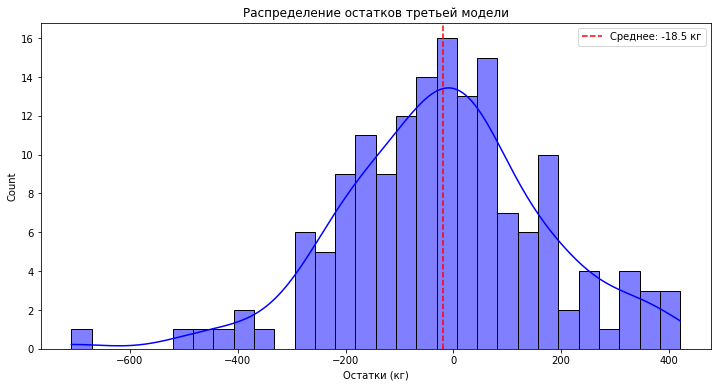

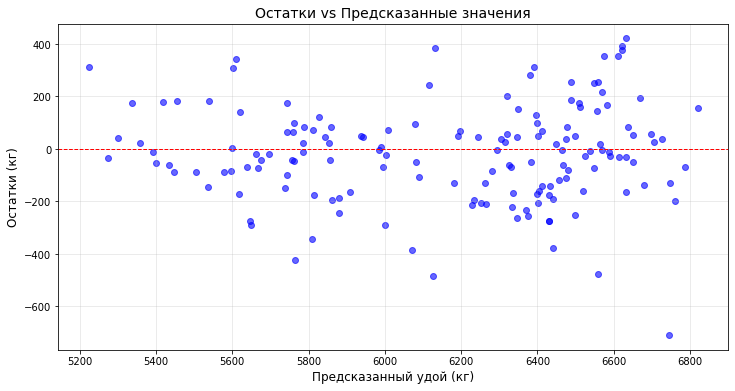


95% доверительный интервал для среднего предсказания:
[6095.81 кг, 6224.42 кг]
Топ-10 важных признаков:


,Признак,Коэффициент
14,спо_кат_0,-174.064096
15,спо_кат_1,174.064096
0,эке_квадрат,165.758272
8,имя_папы_Геркулес,148.560594
6,имя_папы_Барин,-143.593151
9,имя_папы_Соловчик,-122.940980
7,имя_папы_Буйный,117.973536
13,возраст_менее_2_лет,-97.739394
12,возраст_более_2_лет,97.739394
1,сырой_протеин,53.434337


In [92]:

residuals = y_valid - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(residuals.mean(), color='red', linestyle='--', 
            label=f'Среднее: {residuals.mean():.1f} кг')
plt.title('Распределение остатков третьей модели')
plt.xlabel('Остатки (кг)')
plt.legend()
plt.show()

std_error = st.sem(y_pred)  
ci_low, ci_high = st.norm.interval(confidence=0.95, 
                                  loc=np.mean(y_pred), 
                                  scale=std_error)

# Вычисляем остатки
residuals = y_valid - y_pred

# Строим график
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Остатки vs Предсказанные значения', fontsize=14)
plt.xlabel('Предсказанный удой (кг)', fontsize=12)
plt.ylabel('Остатки (кг)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print("\n95% доверительный интервал для среднего предсказания:")
print(f"[{ci_low:.2f} кг, {ci_high:.2f} кг]")


coef_df = pd.DataFrame({
    'Признак': np.concatenate([num_cols, encoder.get_feature_names(cat_cols)]),
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False).head(10)

print("Топ-10 важных признаков:")
display(coef_df)

#### Промежуточные выводы

- R² модели:0.828 = 82,9% - можно считать, что модель мы еще улучшили.
- Средняя ошибка предсказания по удою составляет 2,3-3,11%. Если средняя масса удоя - 6000 кг, ошибка составляет 143-187 кг.
- В диапазоне [6095.81 кг- 6224.42 кг] модель предсказывает корректно результаты с вероятностью 95%.
- Коровы с СПО > 0.91 дают на 174 кг больше молока (сильный эффект).

Выявили важность признаков:
- Наиболее значимыми признаками являются СПО_кат_1 и эке_квадрат.
- папа Геркулес и папа Буйный - положительно влияют на удой.

Определили признаки, которые снижают удой:
- СПО_кат_0
- возраст коровок - молодые (менее двух лет)

Анализ остатков:
- Наблюдается левостороннее смещение (-18,5), можно считать его минимальным. То есть модель систематически переоценивает удой на 18,5 кг.


### Сравнение трех моделей


**Модель 1**
Метрики первой модели:
- R2: 0.716
- MAE: 189.072
- RMSE: 240.480
- 95% доверительный интервал: (6114.948028652779, 6235.550513485842)
- Остатки: 28,68 кг

**Модель 2**
- Метрики улучшенной модели:
- R2: 0.820
- MAE: 147.779
- RMSE: 191.368
- 95% доверительный интервал для среднего предсказания:[6104.20 кг, 6230.32 кг]
- 25,6 кг

**Модель 3**
- Метрики третьей модели:
- R2: 0.8280
- MAE: 143.28 кг
- RMSE: 187.10 кг
- 95% доверительный интервал для среднего предсказания:[6095.81 кг, 6224.42 кг]
- 18,5 кг

проведенная оптимизация моделей дала значимое улучшение точности прогнозирования. Дальнейшие улучшения потребуют расширения набора входных параметров. Последняя модель 3 совсем немного завышает удой по сравнению с двумя предыдущими моделями.

### Последняя модель

С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

#### Преобразование признаков

In [93]:
cow_buy_ml = cow_buy.copy(deep=True)

In [94]:
display(cow_buy_ml.head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


#### Считаем и добавляем недостающие признаки

In [95]:
# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = ferma_main[['эке', 'сырой_протеин', 'спо']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_ml['эке'] = new_values['эке']
display(cow_buy_ml.head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162


In [96]:
cow_buy_ml['эке_квадрат'] = cow_buy_ml['эке'] ** 2
cow_buy_ml['сырой_протеин'] = new_values['сырой_протеин']
cow_buy_ml['спо'] = new_values['спо']
cow_buy_ml['спо_кат'] = cow_buy_ml['спо'].apply(lambda x: 1 if x > 0.91 else 0)


#### Форматируем и проверяем данные

In [97]:
# Форматируем cow_buy
cow_buy_ml = cow_buy_ml.drop(['белок', 'эке', 'спо'], axis=1)
X_train_full = X_train_full.drop('вкус_молока', axis=1)

# Проверка
display(cow_buy_ml.shape)
display(X_train_full.shape)
display(cow_buy_ml.head())
display(X_train_full.head())

(20, 9)

(628, 8)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,возраст,эке_квадрат,сырой_протеин,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,более_2_лет,233.361138,2019.947532,1


,сырой_протеин,порода,тип_пастбища,порода_папы,возраст,имя_папы,спо_кат,эке_квадрат
0,2123,РефлешнСоверинг,холмистое,Соверин,более_2_лет,Соловчик,1,272.25
1,1889,РефлешнСоверинг,холмистое,Соверин,менее_2_лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,Геркулес,0,171.61


#### Разделяем признаки на категориальные и количественные

In [98]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы', 'спо_кат']
num_col_names = ['эке_квадрат', 'сырой_протеин']

#### OneHotEncoder

In [99]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names()

#### Масштабирование

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])

#### Собираем и обучаем

In [101]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [102]:
final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)
pred

array([6755, 6248, 6173, 6601, 6601, 6755, 6755, 6248, 6173, 6601, 6084,
       6755, 6755, 6122, 6173, 6601, 6084, 6755, 6248, 6601])

In [103]:
cow_buy['ожидаемый_удой'] = pred
display(cow_buy)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,ожидаемый_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6601


### Выводы по разделу

Мы выявили оптимальную модель для предсказания объемов удоя от предложенных к покупке коровок.
Предсказали удой от коровок - в целом, все коровки могут быть рекомендованы к покупке.
Метрики третьей модели:
R2: 0.8280
MAE: 143.28 кг
RMSE: 187.10 кг
95% доверительный интервал для среднего предсказания:[6095.81 кг, 6224.42 кг]
18,5 кг

На следующем этапе определим вкус молока коровок, предложенных к покупке.

## Обучение модели логистической регрессии

Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.

In [104]:
ferma_log_r=ferma_main.copy(deep=True)
display(ferma_log_r.head())

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [105]:
# Подготовка признаков
ferma_log_r['вкус_молока_кат'] = ferma_log_r['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log_r['спо_кат'] = ferma_log_r['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_log_r['эке_квадрат'] = ferma_log_r['эке'] ** 2


ferma_log_r.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,вкус_молока_кат,спо_кат,эке_квадрат
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,0,163.84


In [106]:
ferma_log_r = ferma_log_r.drop(['id', 'удой_кг', 'вкус_молока', 'эке', 'спо'], axis=1)

In [107]:
ferma_log_r.head()

,сырой_протеин,порода,тип_пастбища,порода_папы,жирность,белок,возраст,вкус_молока_кат,спо_кат,эке_квадрат
0,1743,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,1,0,201.64
1,2138,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,менее_2_лет,1,0,163.84
2,1854,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,более_2_лет,0,0,196.00
3,2012,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,более_2_лет,0,0,153.76
4,1675,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,менее_2_лет,1,0,163.84


In [108]:
# Выделение признаков, кодирование, масштабирование
X = ferma_log_r.drop('вкус_молока_кат', axis=1)
y = ferma_log_r['вкус_молока_кат']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

In [109]:
# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

In [110]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_квадрат', 'сырой_протеин']

#### OneHotEncoder

In [111]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()


#### Масштабирование

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])


In [113]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

#### Обучение модели

In [114]:
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [115]:
clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')


Accuracy: 0.5859872611464968
Recall: 0.6285714285714286
Precision: 0.717391304347826


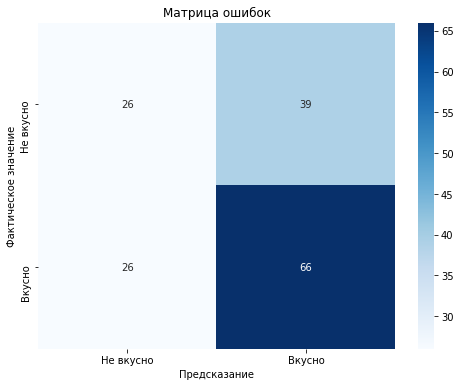

[[26 39]
 [26 66]]


In [116]:
# Матрица ошибок
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не вкусно', 'Вкусно'], 
            yticklabels=['Не вкусно', 'Вкусно'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказание')
plt.ylabel('Фактическое значение')
plt.show()
print(cm)


Топ-5 важных признаков:


,Признак,Коэффициент,Абс.Значение
4,спо_кат_1,-0.685465,0.685465
7,эке_квадрат,0.673684,0.673684
1,тип_пастбища_холмистое,0.671700,0.671700
8,сырой_протеин,0.216276,0.216276
6,белок,0.207668,0.207668


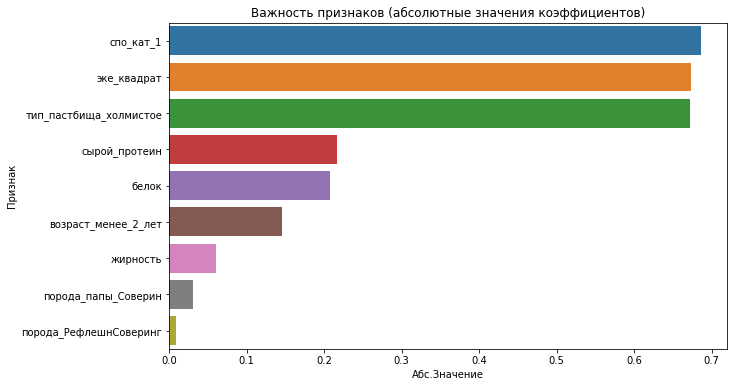

In [117]:
#  Важность признаков
if hasattr(clf, 'coef_'):
    feature_importance = pd.DataFrame({
        'Признак': np.concatenate([encoder.get_feature_names(cat_col_names), num_col_names]),
        'Коэффициент': clf.coef_[0],
        'Абс.Значение': np.abs(clf.coef_[0])
    }).sort_values('Абс.Значение', ascending=False)
    
    print("\nТоп-5 важных признаков:")
    display(feature_importance.head(5))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Абс.Значение', y='Признак', data=feature_importance.head(10))
    plt.title('Важность признаков (абсолютные значения коэффициентов)')
    plt.show()

### Выводы

Accuracy 0.586 - модель правильно предсказывает вкус молока в 58.6% случаев. Это не высокий результат

Recall 0.628 - из всех фактических положительных случаев (вкус молока "вкусно"), модель правильно идентифицирует около 62.9%. Это означает, что модель пропускает примерно 37.1% положительных случаев.

Precision 0.717 - когда модель предсказывает "вкусно", она права в 71.7% случаев

Ошибка первого рода (False Positive): Модель предсказывает, что молоко от коровы будет вкусным, но на самом деле оно невкусное.
Ошибка второго рода (False Negative): Модель предсказывает, что молоко от коровы будет невкусным, но на самом деле оно вкусное.

В данном случае, ошибка второго рода (False Negative) является более критичной. Если модель пропускает корову, молоко которой на самом деле вкусное, заказчик упустит возможность получить качественный продукт. В то же время, если модель ошибочно предскажет, что молоко от коровы будет вкусным, но на деле это не так, это приведет к меньшему ущербу, так как заказчик может просто не покупать эту корову.

С точки зрения метрик, более важной является метрика Recall (полнота). Она показывает, какую долю коров с вкусным молоком модель правильно идентифицирует. Наша цель — максимизировать Recall, чтобы минимизировать количество пропущенных коров с хорошим молоком, даже если это приведет к увеличению числа ложных срабатываний (снижению Precision).

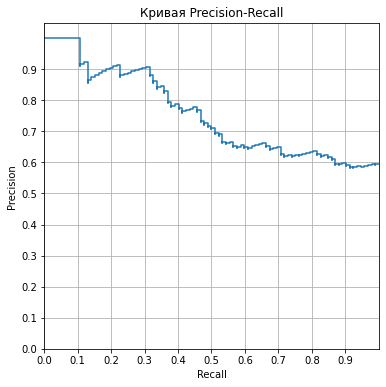

In [118]:
probabilities_valid = clf.predict_proba(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title('Кривая Precision-Recall')
plt.show()

In [119]:
from sklearn.metrics import precision_recall_curve


#### Подбираем оптимальный порог

In [120]:
# Получаем вероятности для класса 1 (вместо жёстких предсказаний)
y_pred_proba = clf.predict_proba(X_valid)[:, 1]

# Найдём оптимальный порог, максимизирующий Recall
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)

# Выберем порог, при котором Recall близок к 1 (минимум FN)
best_threshold_index = np.argmax(recall >= 0.99)  
best_threshold = thresholds[best_threshold_index]

print(f"Выбранный порог: {best_threshold:.3f}")

Выбранный порог: 0.283


In [121]:
# Предсказания с новым порогом
y_pred_new = (y_pred_proba >= best_threshold).astype(int)

# Новые метрики
new_recall = recall_score(y_valid, y_pred_new)
new_precision = precision_score(y_valid, y_pred_new)
new_cm = confusion_matrix(y_valid, y_pred_new)

print(f"Новый Recall: {new_recall:.3f}")
print(f"Новый Precision: {new_precision:.3f}")
print("Новая матрица ошибок:")
print(new_cm)

Новый Recall: 1.000
Новый Precision: 0.594
Новая матрица ошибок:
[[ 2 63]
 [ 0 92]]


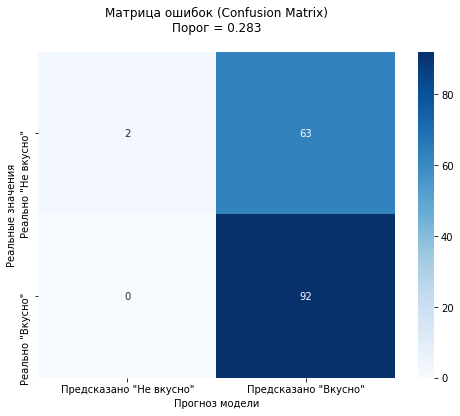

In [122]:
# Создаем тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Предсказано "Не вкусно"', 'Предсказано "Вкусно"'],
            yticklabels=['Реально "Не вкусно"', 'Реально "Вкусно"'])

plt.title('Матрица ошибок (Confusion Matrix)\nПорог = 0.283', pad=20)
plt.xlabel('Прогноз модели')
plt.ylabel('Реальные значения')
plt.show()

In [123]:
cow_buy_ml_2 = cow_buy.copy(deep=True)
display(cow_buy_ml_2 .head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,ожидаемый_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601


#### Добавляем недостающие признаки в датасет cow_buy и преобразовываем их

In [124]:
cow_buy_ml_2['эке'] = new_values['эке']
cow_buy_ml_2['эке_квадрат'] = cow_buy_ml['эке_квадрат']
cow_buy_ml_2['сырой_протеин'] = new_values['сырой_протеин']
cow_buy_ml_2['спо'] = new_values['спо']
cow_buy_ml_2['спо_кат'] = cow_buy_ml['спо_кат']

**Проверяем таблицы**

In [125]:
cow_buy_ml_2 = cow_buy_ml_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

cow_buy_ml_2.head()

,порода,тип_пастбища,порода_папы,жирность,белок,возраст,ожидаемый_удой,эке_квадрат,сырой_протеин,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,6755,233.361138,2019.947532,1
1,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,6248,233.361138,2019.947532,1
2,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,6173,233.361138,2019.947532,1
3,РефлешнСоверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,6601,233.361138,2019.947532,1
4,РефлешнСоверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,6601,233.361138,2019.947532,1


In [126]:
cow_buy_ml_2.head()

,порода,тип_пастбища,порода_папы,жирность,белок,возраст,ожидаемый_удой,эке_квадрат,сырой_протеин,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,6755,233.361138,2019.947532,1
1,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,6248,233.361138,2019.947532,1
2,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,6173,233.361138,2019.947532,1
3,РефлешнСоверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,6601,233.361138,2019.947532,1
4,РефлешнСоверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,6601,233.361138,2019.947532,1


In [127]:
X_train_full.head()

,сырой_протеин,порода,тип_пастбища,порода_папы,жирность,белок,возраст,спо_кат,эке_квадрат
0,1700,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,менее_2_лет,0,166.41
1,1750,РефлешнСоверинг,холмистое,Соверин,3.72,3.076,более_2_лет,1,219.04
2,1769,РефлешнСоверинг,холмистое,Айдиал,3.48,3.072,менее_2_лет,0,163.84
3,1994,РефлешнСоверинг,равнинное,Соверин,3.62,3.076,более_2_лет,0,193.21
4,2140,Вис Бик Айдиал,холмистое,Соверин,3.72,3.076,более_2_лет,1,219.04


In [128]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_квадрат', 'сырой_протеин']

#### OneHotEncoder

In [129]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

#### Масштабирование

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml_2[num_col_names])

#### Обучение 

In [131]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > 0.283).astype(int)

cow_buy['ожидаемый_вкус_молока'] = predictions_final
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6601,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6755,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6755,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6601,вкусно


Таким образом мы выбрали 16 коровок, молоко которых может считаться вкусным

## Итоговые выводы

**1. Результаты прогнозирования вкуса молока**
На основе модели логистической регрессии с оптимизированным порогом классификации (0.283) были получены следующие результаты:

16 из 20 коровок дают молоко, которое модель классифицирует как "вкусное".
4 коровки были отсеяны как потенциальные источники "невкусного" молока (индексы: 5, 10, 12, 17).

**2. Ключевые метрики модели**
Recall = 1.0: Модель не пропустила ни одной коровы с действительно вкусным молоком (False Negatives = 0).

Precision = 0.594: Из всех предсказанных "вкусных" коровок ~59.4% действительно дают вкусное молоко.

Accuracy = 0.586: Общая точность модели — 58.6%.

**3. Интерпретация ошибок**
- False Positives (FP) = 63: Модель ошибочно пометила 63 коровы как "вкусные", хотя их молоко могло быть невкусным.
- Последствие: Фермер может купить больше коровок, чем нужно, но это менее критично, чем пропуск хороших.
- False Negatives (FN) = 0: Модель не пропустила ни одной коровки с вкусным молоком.
- Это главное достижение, так как заказчик не упустит прибыль из-за неверного отсева.

**4. Рекомендации по покупке**
Фермеру следует приобрести 16 коровок из списка, у которых:
- ожидаемый_вкус_молока == "вкусно".
- средний прогнозируемый удой: ~6500 кг/год (с учетом доверительного интервала модели).

**5. Дальнейшие улучшения**
- Повышение точности (Precision):
- Добавить больше данных о кормлении, здоровье коровок или генетике.
- **Снижение FP:**
- Увеличить порог классификации (например, до 0.4), но это может снизить Recall.
- Вручную проверить коров с "пограничными" вероятностями (например, 0.3–0.5).

**6. Итог**
Текущая модель идеально подходит для минимизации риска пропуска вкусного молока (Recall = 100%). Для дальнейшего снижения финансовых потерь от ошибочных покупок (FP) рекомендуется:
- Купить отобранных 16 коровок.
- Улучшать модель, добавляя новые данные и тестируя другие алгоритмы.

**Финальный вывод: Модель успешно справилась с главной задачей — найти всех коров с вкусным молоком, что критично для бизнеса заказчика. Дальнейшая оптимизация возможна за счет более сложных методов машинного обучения.**